In [14]:
%matplotlib inline
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from py4DSTEM.process.braggdiskdetection import get_average_probe_from_ROI, get_probe_kernel_subtrgaussian
from py4DSTEM.process.utils import get_CoM
from py4DSTEM.file.datastructure import DiffractionSlice, RealSlice
from py4DSTEM.file.io import read, save

from scipy import ndimage
from skimage import filters

import h5py

In [5]:
# Reading from the matlab/h5 file
filename = 'C:/Users/Roberto/Box/Collaboration PaulSmeets_NU/ScanningDIff/stack4D.mat'

## importing .mat files
f = h5py.File(filename,'r')

data = f.get('stem4D')
data = np.array(data)

data.shape , type(data)

((512, 512, 265, 262), numpy.ndarray)

In [8]:
# filename = 'Diffraction of vacuum_256x256_50_25.dm3'
filename='C:/Users/Roberto/Box/Collaboration PaulSmeets_NU/ScanningDIff/vacuum_256x256_50_25.dm4'

from ncempy.io import dm
vacuum = dm.dmReader(filename)

In [9]:
#normalize by vacuum probe
vacuum_sum=np.sum(vacuum['data'])
data = data/vacuum_sum

In [10]:
del vacuum

In [11]:
ave_dp = np.sum(data,axis=(2,3))
ave_im = np.sum(data,axis=(0,1))

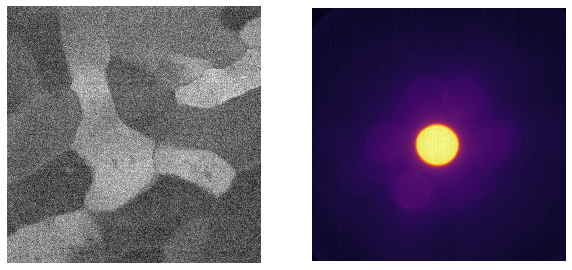

In [23]:
fig,ax=plt.subplots(1,2, figsize=(10,6))

#plot real space image
ax[0].imshow(ave_im, cmap = plt.cm.gray)
ax[1].imshow(np.sqrt(ave_dp), cmap=plt.cm.inferno)

ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [ ]:
from skimage import feature
blob=feature.blob_log(ave_dp, threshold = .000001)
ic=blob[0,0]
jc=blob[0,1]
print("ic is " + str(ic))
print("jc is " + str(jc))

In [28]:
xa, ya = 80, 165 

#rotate point by 60° relative to ic, jc (going to use point-point form to define lines for masks)
theta = np.radians(60)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

v=np.array([[xa-jc],[ya-ic]])
v=np.dot(v.T,R).T
xb=v[0,0]+jc
yb=v[1,0]+ic

v=np.dot(v.T,R).T
xc=v[0,0]+jc
yc=v[1,0]+ic

masks=[]

#radii=[30,50,70,90]
radii=[30] #mask start radii in pixels
width=50 #mask width in pixels
#create masks changing inequalities
x, y = np.indices((aveDP.shape[0], aveDP.shape[1]))

for aa in radii: 
    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xa - (jc-xa)/(ic-ya) * (x-ya) > 0
    mask_line_perpendicular =  y - xc - (jc-xc)/(ic-yc) * (x-yc) > 0
    mask1 = np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask1)
    
    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xb - (jc-xb)/(ic-yb) * (x-yb) > 0
    mask_line_perpendicular =  y - xc - (jc-xc)/(ic-yc) * (x-yc) < 0
    mask2= np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask2)

    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xa - (jc-xa)/(ic-ya) * (x-ya) > 0
    mask_line_perpendicular =  y - xb - (jc-xb)/(ic-yb) * (x-yb) < 0
    mask3 = np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask3)

    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xa - (jc-xa)/(ic-ya) * (x-ya) < 0
    mask_line_perpendicular =  y - xc - (jc-xc)/(ic-yc) * (x-yc) < 0
    mask4 = np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask4)

    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xc - (jc-xc)/(ic-yc) * (x-yc) > 0
    mask_line_perpendicular =  y - xb - (jc-xb)/(ic-yb) * (x-yb) < 0
    mask5= np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask5)

    mask_circle = (x - ic) ** 2 + (y-jc) ** 2 < (aa+width) ** 2
    mask_circle2 = (x - ic) ** 2 + (y-jc) ** 2 > aa ** 2
    mask_line =  y - xa - (jc-xa)/(ic-ya) * (x-ya) < 0
    mask_line_perpendicular =  y - xb - (jc-xb)/(ic-yb) * (x-yb) > 0
    mask6 = np.logical_and(np.logical_and(np.logical_and(mask_circle, mask_line), mask_line_perpendicular), mask_circle2)
    masks.append(mask6)

In [29]:
color_maps=[]
int_mask=np.zeros((normalized_data.shape[0],normalized_data.shape[1]))

for k in range(6*len(radii)):
    int_mask=np.zeros((normalized_data.shape[0],normalized_data.shape[1]))
    for i in range(0,aveDP.shape[0]):
        for j in range(0,aveDP.shape[1]): 
            if masks[k][i,j]:
                int_mask=int_mask+normalized_data[:,:,i,j] 
    #int_mask=int_mask/masks_12[k].sum()
    color_maps.append(int_mask)

In [33]:
num=np.linspace(0,6*len(radii)-1,6*len(radii))
for numbers in num:
  print(f"Mask {int(numbers)} max is {np.min(color_maps[int(numbers)])}")
   # print(f"Mask {int(numbers)} min is {np.min(color_maps[int(numbers)])}")

Mask 0 max is 0.15755949848416576
Mask 1 max is 0.14897363000834893
Mask 2 max is 0.14267708910041468
Mask 3 max is 0.15577396539661764
Mask 4 max is 0.14580132695549675
Mask 5 max is 0.15598936869033034


<IPython.core.display.Javascript object>


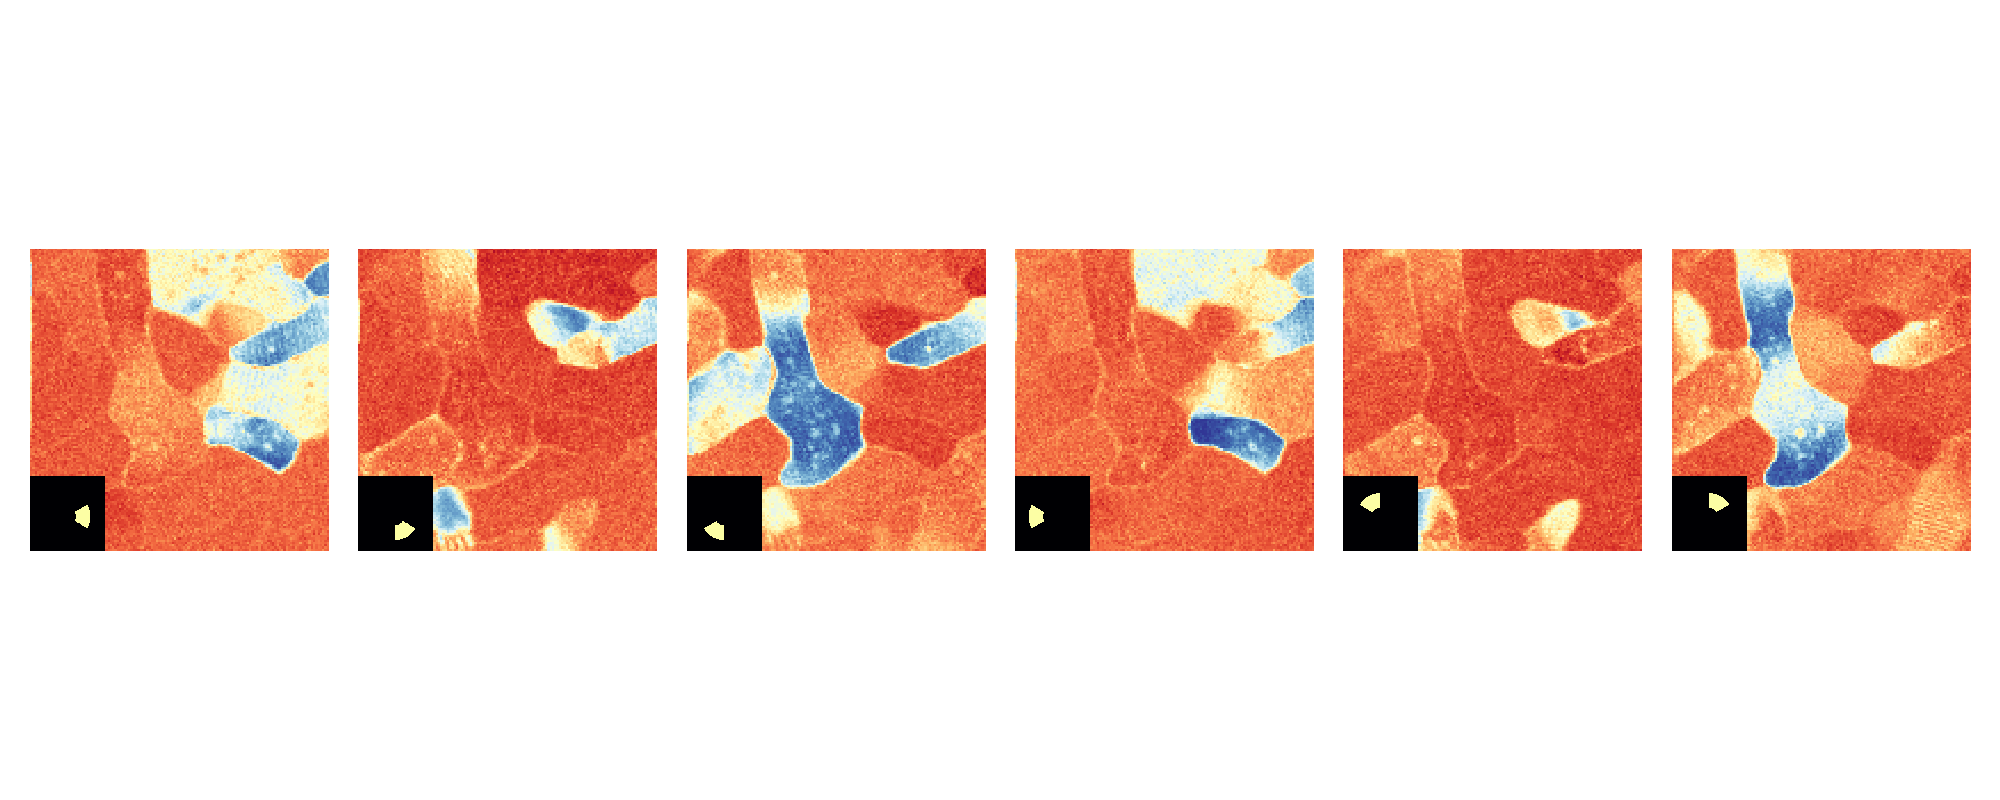

In [34]:
fig, axes = plt.subplots(len(radii),6, figsize=(10,4))
for ax, numbers in zip(axes.flatten(), num):
    ax.imshow(np.log10(color_maps[int(numbers)]), cmap=plt.cm.RdYlBu, vmax=np.log10(0.7112029294847886), vmin=np.log10(0.14267708910041468))
    ins = ax.inset_axes([0,0,0.25,0.25])
    ins.imshow(masks[int(numbers)], cmap=plt.cm.inferno)
    ax.axis('off')
    ins.axis('off')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


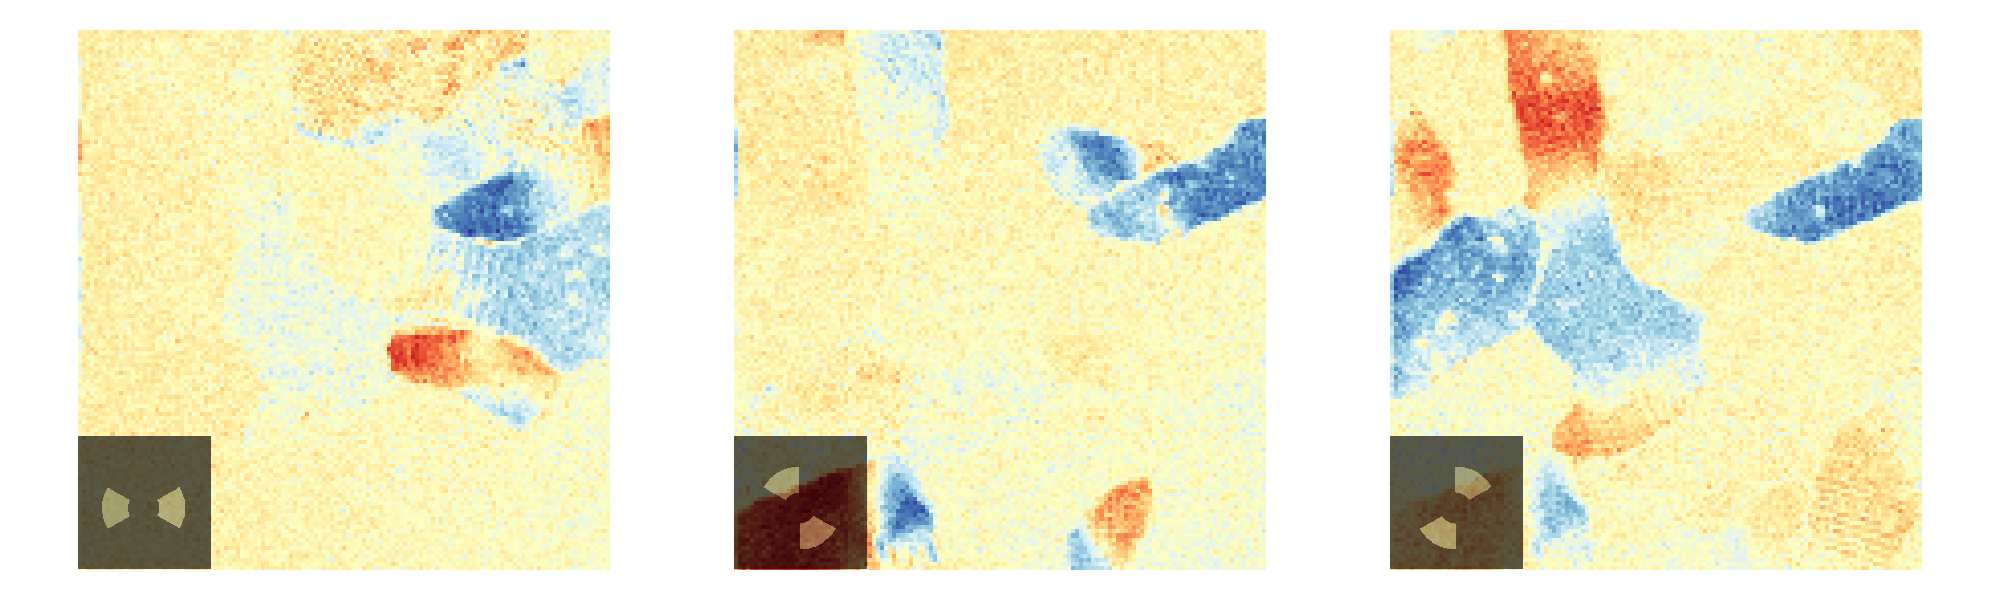

-0.39230667667333097
-0.46531696946269824
-0.3924206259851418


In [40]:
num=np.array([0,1,2])
fig, axes = plt.subplots(1,3, figsize=(10,3))
for ax, numbers in zip(axes.flatten(), num):
    ax.imshow((color_maps[int(numbers)]-color_maps[int(numbers+3)])/
                       (color_maps[int(numbers)]+color_maps[int(numbers+3)]), cmap=plt.cm.RdYlBu, vmax=0.49804546679597106, vmin=-0.46531696946269824)
    #print(np.min((color_maps[int(numbers)]-color_maps[int(numbers+3)])/
    #                  (color_maps[int(numbers)]+color_maps[int(numbers+3)])))
    ins = ax.inset_axes([0,0,0.25,0.25])
    ins.imshow(masks[int(numbers)], cmap=plt.cm.inferno, alpha=0.5)
    ins.imshow(masks[int(numbers + 3)], cmap=plt.cm.inferno, alpha=0.3)
    ax.axis('off')
    ins.axis('off')
plt.tight_layout()
plt.show()